In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

#Class defenition Networ with 2 hidden layers


In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w0 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.h4 = self.sigmoid(self.a4)
    self.a5 = self.w9*self.h3 + self.w0*self.h4 + self.b5
    self.h5 = self.sigmoid(self.a5)

    return self.h5
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw9 = (self.h5-y) * self.h5*(1-self.h5) * self.h3
    self.dw0 = (self.h5-y) * self.h5*(1-self.h5) * self.h4
    self.db5 = (self.h5-y) * self.h5*(1-self.h5)
    
    self.dw5 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3)

    self.dw7 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4) * self.h1
    self.dw8 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4) * self.h2
    self.db4 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4)

    self.dw1 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h5-y) * self.h5*(1-self.h5) * self.w9 * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

    self.dw3 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h5-y) * self.h5*(1-self.h5) * self.w0 * self.h4*(1-self.h4) * self.w8 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w0 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw0, db1, db2, db3, db4, db5 = [0]*15
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw0 += self.dw0
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w0 -= learning_rate * dw0 / m

      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

#Generate data


In [49]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


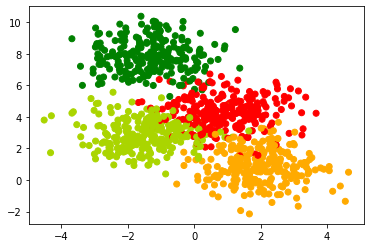

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

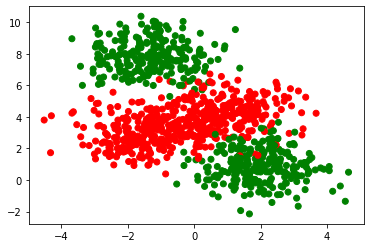

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


#Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


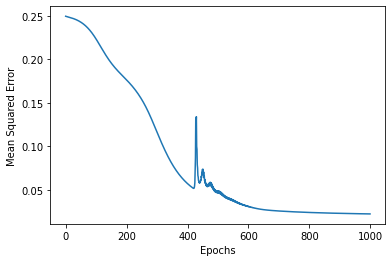

In [61]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=1000, learning_rate=.01, display_loss=True)

In [62]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


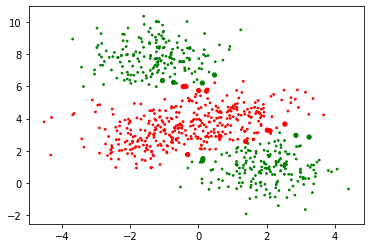

In [63]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()